### Q 1.
Answer Questions 1 to 5 using the customerspends.csv Dataset An online grocery store has captured amount spent per annum (in Indian rupees) by 20 customers on apparel and beauty and healthcare products and given in the file customerspends.csv. It contains the following records.

* Customer − Customer ID
* Apparel − Amount spent in apparel products 
* Beauty and Healthcare − Amount spent in beauty and healthcare products

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [25]:
dataset = pd.read_csv("customerspends.csv")
dataset = dataset.drop(columns=["Customer"],axis=1)
dataset.head()

,Apparel,Beauty and Healthcare
0,21.10,0.7
1,15.23,5.5
2,5.22,18.6
3,31.10,1.8
4,6.12,21.5


#### 1. Create a scatter plot to depict the customer spends on apparel and beauty and healthcare products. Identify number of clusters existing in the dataset.

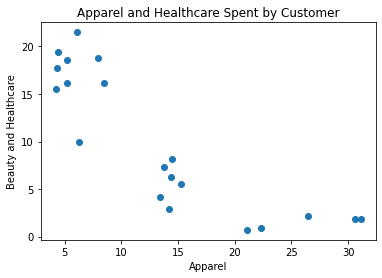

In [26]:
plt.scatter(dataset.Apparel, dataset["Beauty and Healthcare"])
plt.xlabel("Apparel")
plt.ylabel("Beauty and Healthcare")
plt.title("Apparel and Healthcare Spent by Customer")
plt.show()

Ans: By looking at the scatter ploat we can decide there are 3 clusters

#### 2. Normalize the features using StandardScaler and plot them in the scatter plot again.

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset = sc.fit_transform(dataset)

In [30]:
dataset

array([[ 0.892371  , -1.26688022],
       [ 0.20647107, -0.59775334],
       [-0.96318111,  1.22840542],
       [ 2.06085469, -1.11353864],
       [-0.85801758,  1.63266957],
       [ 0.12117176, -0.22136947],
       [-0.57991846,  0.89384198],
       [ 1.52335219, -1.05777807],
       [-1.06600768,  1.10294413],
       [ 0.03353548, -0.34683076],
       [-0.96551808,  0.89384198],
       [ 0.08611725, -0.96019707],
       [-1.05899677,  1.33992657],
       [-1.07652403,  0.79626098],
       [ 1.03258904, -1.23899993],
       [-0.65002748,  1.25628571],
       [-0.00736145, -0.7789752 ],
       [ 2.00243051, -1.0995985 ],
       [ 0.10948692, -0.48902022],
       [-0.84282729,  0.02676507]])

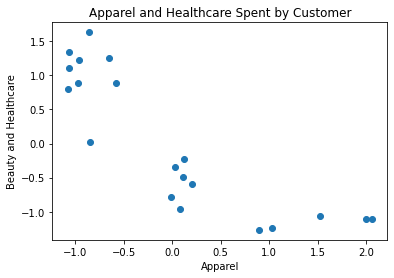

In [31]:
plt.scatter(dataset[:,0], dataset[:,1])
plt.xlabel("Apparel")
plt.ylabel("Beauty and Healthcare")
plt.title("Apparel and Healthcare Spent by Customer")
plt.show()

Ans: Getting the same conclusion as we have recived without Standard Scaler that is there are 3 clusters

#### 3. Use dendrogram and elbow method to verify if the number of clusters suggested is same as clusters visible in the scatter plot in Question 1.

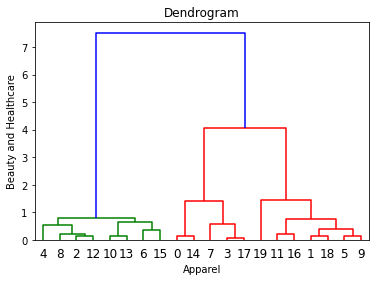

In [33]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(dataset, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel("Apparel")
plt.ylabel("Beauty and Healthcare")
plt.show()

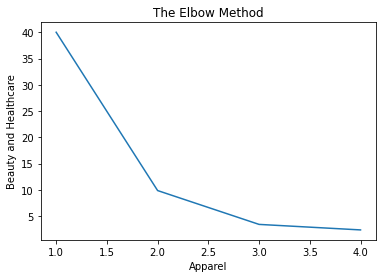

In [35]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 5), wcss)
plt.title('The Elbow Method')
plt.xlabel("Apparel")
plt.ylabel("Beauty and Healthcare")
plt.show()

Ans: Getting the same conclusion as received earliner ie. there is three clusters

#### 4. Create the number of clusters as suggested by the elbow method using K-means algorithm.

In [48]:
dataset = pd.read_csv("customerspends.csv")
dataset = dataset.drop(columns=["Customer"],axis=1)

In [49]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
y_hc = cluster.fit_predict(dataset)

#### 5. Print the records of customers in each cluster and the cluster center of each cluster separately. Explain the clusters intuitively.

In [50]:
dataset["Cluster"] = y_hc
cluster_data = dataset.groupby(by = "Cluster").mean()
cluster_data_count = []
for i in range(3):
  cluster_data_count.append((dataset.Cluster[dataset.Cluster == i]).count())

cluster_data["Count"] = cluster_data_count
cluster_data

,Apparel,Beauty and Healthcare,Count
Cluster,,,
0,26.320000,1.500000,5
1,5.797778,17.097778,9
2,14.246667,5.730000,6


Ans: following are the colnclusion:
* out of 20 customers 5 are in cluster 0 who spent highest in Appareal and lowest in Healthcare
* out of 20 customers 9 are in cluster 1 who spent highest in Healthcare and lowest in Appareal
* out of 20 customers 6 are in cluster 2 who spent average in Healthcare as well as Appareal



---



### Q 2.
Answer Questions 1 to 5 using the Income Data.csv Dataset A Company wants to increase its brand awareness to appeal to all its existing or possible future customers, it must design a campaign. The company can design a single campaign to address all its customers. But what if its customers have different characteristics such as varied income, age, preferences, profession, gender? The same campaign may not appeal to all of them. The company can think of running multiple campaigns targeting different customer segments. For that consider Income Data.csv that stores the data of income and age of each customers.


In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [105]:
dataset = pd.read_csv("Income Data.csv")
dataset.head()

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


#### 1.	Create a scatter plot to depict how many number of clusters exists into the dataset.

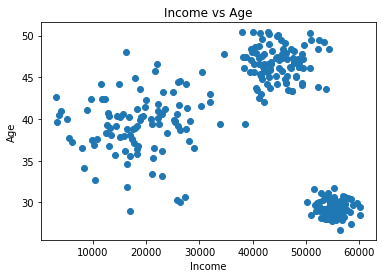

In [106]:
plt.scatter(dataset.income, dataset.age)
plt.xlabel("Income")
plt.ylabel("Age")
plt.title("Income vs Age")
plt.show()

Ans: By looking at the scatter ploat we can decide there are 3 clusters

#### 2.	Normalize the features using StandardScaler and plot them in the scatter plot again.

In [107]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset = sc.fit_transform(dataset)

In [108]:
dataset[:5]

array([[ 0.09718548,  1.3701637 ],
       [ 0.90602749, -1.3791283 ],
       [ 0.51405021,  1.10388844],
       [-1.27162408,  0.23849387],
       [-1.32762083, -0.35396857]])

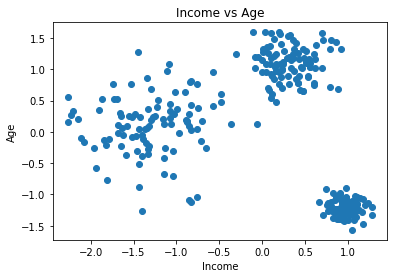

In [109]:
plt.scatter(dataset[:,0], dataset[:,1])
plt.xlabel("Income")
plt.ylabel("Age")
plt.title("Income vs Age")
plt.show()

Ans: Getting the same conclusion as we have recived without Standard Scaler that is there are 3 clusters

#### 3.	Use dendrogram and elbow method to verify if the number of clusters suggested is same as clusters visible in the scatter plot in Question 1.

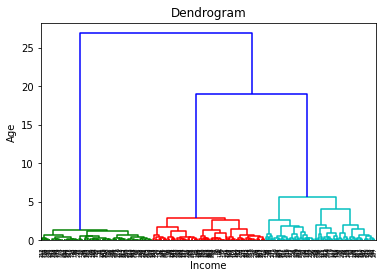

In [110]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(dataset, method = 'ward'))
plt.xlabel("Income")
plt.ylabel("Age")
plt.title("Dendrogram")
plt.show()

Ans: Getting the same conclusion as received earliner ie. there is three clusters

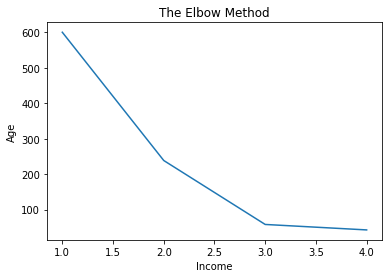

In [111]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 5), wcss)
plt.title('The Elbow Method')
plt.xlabel("Income")
plt.ylabel("Age")
plt.show()

Ans: Getting the same conclusion as received earliner ie. there is three clusters

#### 4.	Create the number of clusters as suggested by the elbow method using K-means algorithm.

In [112]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
y_hc = cluster.fit_predict(dataset)

#### 5. Print the records of customers in each cluster and the cluster center of each cluster separately. Explain the clusters intuitively.

In [117]:
dataset = sc.inverse_transform(dataset)

In [118]:
dataset = pd.DataFrame(dataset,columns=["Income", "Age"])
dataset.head()

,Income,Age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


In [119]:
dataset["Cluster"] = y_hc
cluster_data = dataset.groupby(by = "Cluster").mean()
cluster_data_count = []
for i in range(3):
  cluster_data_count.append((dataset.Cluster[dataset.Cluster == i]).count())

cluster_data["Count"] = cluster_data_count

In [120]:
cluster_data

,Income,Age,Count
Cluster,,,
0,18663.636364,39.181818,99
1,55204.000000,29.384000,100
2,44488.118812,46.734653,101


Ans: following are the colnclusion:
* out of 200 customers 99 are in cluster 0 who are having lowest income and age is around 39
* out of 200 customers 100 are in cluster 1 who are having Highest income and age is lowest amoung other around  29
* out of 200 customers 6 are in cluster 2 who are having medium income and age is highist among other around 46



---



### Q 3.
Answer Questions 1 to 5 using the Online Retail.xlsx Dataset

Online Retail.xlsx contains records of transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The attributes in the dataset are:

*	InvoiceN − Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter “c”, it indicates a cancellation.
*	StockCode − Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
*	Description − Product (item) name. Nominal.
*	Quantity − The quantities of each product (item) per transaction. Numeric.
*	InvoiceDate − Invoice Date and time. Numeric, the day and time when each transaction was generated.
*	UnitPrice − Unit price. Numeric, Product price per unit in sterling.
*	CustomerID − Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
*	Country − Country name. Nominal, the name of the country where each customer resides.

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [126]:
dataset = pd.read_excel(open('Online Retail.xlsx', 'rb'),sheet_name='Online Retail') 
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### 1. Select only the transactions that have occurred in the year 06/01/11 and 11/30/11 and create a new subset of data. For answering questions from 1 to 5, use this subset of data.

In [207]:
subset_data = dataset[dataset.InvoiceDate >= "2011-06-01 00:00:00" ][dataset.InvoiceDate <= "2011-11-30 23:59:59"]
subset_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
209029,555156,23299,FOOD COVER WITH BEADS SET 2,6,2011-06-01 07:37:00,3.75,15643.0,United Kingdom
209030,555156,22847,BREAD BIN DINER STYLE IVORY,1,2011-06-01 07:37:00,16.95,15643.0,United Kingdom
209031,555157,23075,PARLOUR CERAMIC WALL HOOK,16,2011-06-01 07:38:00,4.15,15643.0,United Kingdom
209032,555157,47590B,PINK HAPPY BIRTHDAY BUNTING,6,2011-06-01 07:38:00,5.45,15643.0,United Kingdom
209033,555157,22423,REGENCY CAKESTAND 3 TIER,4,2011-06-01 07:38:00,12.75,15643.0,United Kingdom


#### 2. Calculate the RFM values for each customer (by customer id). RFM represents
*	R (Recency) − Recency should be calculated as the number of months before he or she has made a purchase from the online store. If he/she made a purchase in the month of November 2011, then the Recency should be 0. If purchase is made in October 2011 then Recency should be 1 and so on and so forth.
*	F (Frequency) − Number of invoices by the customer from 06/01/11 to 11/30/11. 
* M (Monetary Value) − Total spend by the customer from 06/01/11 to 11/30/11.

Note: i have droped row which does not have customer id

In [264]:
subset_data = subset_data.dropna(axis=0, subset=["CustomerID"])
subset_data_customer_info = pd.DataFrame(np.unique(subset_data["CustomerID"]), columns=["CustomerID"])

In [265]:
recency, frequency, monetary_value = [],[],[]
for i in subset_data_customer_info.CustomerID:
  customer_invoices = subset_data[subset_data.CustomerID == i]
  recency.append(11 - customer_invoices.iloc[0,4].month)
  customer_invoices["InvoiceNo"] = customer_invoices["InvoiceNo"].astype(str)
  frequency.append(len(np.unique(customer_invoices["InvoiceNo"])))
  monetary_value.append(sum(list(customer_invoices.Quantity * customer_invoices.UnitPrice)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [266]:
subset_data_customer_info["recency"] = recency
subset_data_customer_info["frequency"] = frequency
subset_data_customer_info["monetary_value"] = monetary_value

In [267]:
subset_data_customer_info.head()

,CustomerID,recency,frequency,monetary_value
0,12347.0,5,3,2261.75
1,12348.0,2,1,310.00
2,12349.0,0,1,1757.55
3,12352.0,2,3,944.23
4,12356.0,0,1,58.35


#### 3. Use dendrogram and elbow method to identify how many customer segments exist, using the RFM values for each customer created in Question 7.

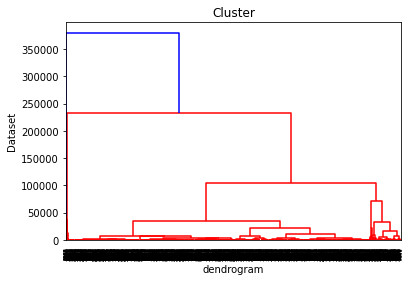

In [269]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(subset_data_customer_info.iloc[:,1:], method = 'ward'))
plt.xlabel("dendrogram")
plt.ylabel("Dataset")
plt.title("Cluster")
plt.show()

Ans: it is deficult to decide cluster using dendogram

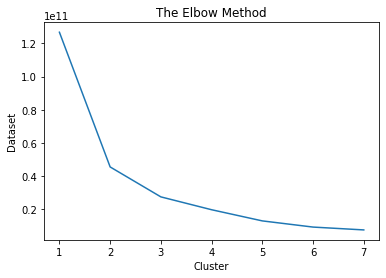

In [270]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(subset_data_customer_info)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 8), wcss)
plt.title('The Elbow Method')
plt.xlabel("Cluster")
plt.ylabel("Dataset")
plt.show()

Ans: we should select 4 as no of clusters
<br>
Analysis:  earlier i have performed Kmeans on 5 cluster and found that 2 clusters is having minor differance, and can be removed, so kept 4 as cluster 
<br>
Even after this i found 3 is best option

#### 4. Create the customer segments with K-means algorithm by using number of clusters is suggested by elbow method.

In [283]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
y_hc = cluster.fit_predict(subset_data_customer_info)

#### 5. Print the cluster centers of each customer segment and explain them intuitively.

In [284]:
subset_data_customer_info["Cluster"] = y_hc
cluster_data = subset_data_customer_info.groupby(by = "Cluster").mean()
cluster_data_count = []
for i in range(3):
  cluster_data_count.append((subset_data_customer_info.Cluster[subset_data_customer_info.Cluster == i]).count())

cluster_data["Count"] = cluster_data_count

In [285]:
cluster_data = cluster_data.drop(axis=1,columns=["CustomerID"])
cluster_data = cluster_data.round(decimals=2)
cluster_data

,recency,frequency,monetary_value,Count
Cluster,,,,
0,2.91,3.30,1060.21,3480
1,5.00,43.00,156293.09,3
2,4.75,41.12,42415.26,16


Ans: following are the colnclusion:
> out of 3499 customers 3480 are in cluster 0 who are having 2.91 as average Recency, frequency is 3.30 and having lowest monetary value rs 1060
> this are those customers who came to shop for daily esentails when needed, and are loyal customers

> Cluster 1 is having 3 customers only and having highest monetary value as compared to other cluster customers
> Maybe this customers are corporate customers

> Cluster 2 is having 16 customers and having 42,415 rs monetary value but the they have not purchased since 5 months so, Shop keeps should give best offer to this customer, to incress sells value



---



### Q 4.
Answer Questions 1 to 3 using the Dataset groceries.csv.

Groceries.csv contains transactions of a grocery store. Each line in the dataset is an order and contains a variable number of items. Each item in each order is separated by a comma in the dataset.

In [286]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [323]:
dataset = open('groceries.csv')
dataset = pd.DataFrame(dataset)
bucket = []
for i in dataset.values:
  bucket.append(i[0][:-2].split(","))

#### 1.	Convert the transaction into one hot encoding format

In [330]:
from mlxtend.preprocessing import OnehotTransactions
from mlxtend.frequent_patterns import apriori, association_rules
# Initialize OnehotTransactions
one_hot_encoding = OnehotTransactions()
# Transform the data into one-hot-encoding format
one_hot_txns = one_hot_encoding.fit(bucket).transform(bucket)
# Conver the matrix into the dataframe.
one_hot_txns_df = pd.DataFrame(one_hot_txns,columns=one_hot_encoding.columns_)
one_hot_txns_df = one_hot_txns_df.astype(int)
one_hot_txns_df.head()

/usr/local/lib/python3.6/dist-packages/mlxtend/preprocessing/onehot.py:66: DeprecationWarning: OnehotTransactions has been deprecated and will be removed in future. Please use TransactionEncoder instead.
  warnings.warn(msg, DeprecationWarning)


,Instant food product,Instant food products,UHT-mil,UHT-milk,abrasive cleane,abrasive cleaner,artif. sweetene,artif. sweetener,baby cosmetic,baby cosmetics,baby food,bag,baking powde,baking powder,bathroom cleane,bathroom cleaner,bee,beef,berrie,berries,beverage,beverages,bottled bee,bottled beer,bottled wate,bottled water,brand,brandy,brown brea,brown bread,butte,butter,butter mil,butter milk,cake ba,cake bar,cand,candle,candles,candy,...,specialty vegetable,specialty vegetables,spice,spices,spread chees,spread cheese,suga,sugar,sweet spread,sweet spreads,syru,syrup,te,tea,tidbit,tidbits,toilet cleane,toilet cleaner,tropical frui,tropical fruit,turke,turkey,vinega,vinegar,waffle,waffles,whipped/sour crea,whipped/sour cream,whisk,whisky,white brea,white bread,white win,white wine,whole mil,whole milk,yogur,yogurt,zwiebac,zwieback
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


#### 2.	Generate the association rules for the given dataset. Filter out all the rules by minimum support of 0.02

In [331]:
frequent_itemsets = apriori(one_hot_txns_df, min_support=0.02, use_colnames=True)

#### 3.	Find the top 10 rules from the above association rule set , sorted by confidence in descending order.

In [336]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values('confidence', ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
102,"(yogurt, other vegetables)",(whole milk),0.041179,0.235079,0.021657,0.525926,2.237232,0.011977,1.613506
11,(butter),(whole milk),0.053279,0.235079,0.027250,0.511450,2.175655,0.014725,1.565698
18,(curd),(whole milk),0.050635,0.235079,0.025521,0.504016,2.144030,0.013618,1.542230
22,(domestic eggs),(whole milk),0.057346,0.235079,0.028165,0.491135,2.089235,0.014684,1.503190
95,"(root vegetables, other vegetables)",(whole milk),0.045857,0.235079,0.022471,0.490022,2.084502,0.011691,1.499911
94,"(root vegetables, whole milk)",(other vegetables),0.047178,0.180173,0.022471,0.476293,2.643534,0.013970,1.565431
90,(whipped/sour cream),(whole milk),0.063854,0.235079,0.029792,0.466561,1.984698,0.014781,1.433942
72,(root vegetables),(whole milk),0.104830,0.235079,0.047178,0.450048,1.914458,0.022535,1.390888
36,(root vegetables),(other vegetables),0.104830,0.180173,0.045857,0.437439,2.427887,0.026969,1.457313
46,(whipped/sour cream),(other vegetables),0.063854,0.180173,0.027555,0.431529,2.395081,0.016050,1.442161




---



# Q 5.
Answer Questions 1 to 5 using the Dataset Online Retail.xlsx.

In [337]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [338]:
dataset = pd.read_excel(open('Online Retail.xlsx', 'rb'),sheet_name='Online Retail') 
dataset.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ResourceWarning: unclosed file <_io.BufferedReader name='Online Retail.xlsx'>
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### 1. Select only the transactions that have occurred during the period 09/01/11 and 11/30/11 and create a new subset of data. For answering Questions 2 to 5, use this subset of data.

In [339]:
subset_data = dataset[dataset.InvoiceDate >= "2011-09-01 00:00:00" ][dataset.InvoiceDate <= "2011-11-30 23:59:59"]
subset_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
320705,565080,20677,PINK POLKADOT BOWL,8,2011-09-01 08:25:00,1.25,13509.0,United Kingdom
320706,565080,22128,PARTY CONES CANDY ASSORTED,24,2011-09-01 08:25:00,1.25,13509.0,United Kingdom
320707,565081,21067,NaN,1,2011-09-01 09:03:00,0.00,NaN,United Kingdom
320708,565082,22423,REGENCY CAKESTAND 3 TIER,2,2011-09-01 09:15:00,12.75,13305.0,United Kingdom
320709,565082,15060B,FAIRY CAKE DESIGN UMBRELLA,8,2011-09-01 09:15:00,3.75,13305.0,United Kingdom


#### 2. Transform the above dataset in Question 1 into another dataset where each record represents an invoice. The record will have an InvoiceNo as column and StockCodes of the corresponding items bought in the invoice. The number of StockCodes in an invoice can be variable.

In [365]:
subset_data = subset_data.dropna(axis=0, subset=["InvoiceNo"])
subset_data["InvoiceNo"] = subset_data["InvoiceNo"].astype(str)
subset_data["StockCode"] = subset_data["StockCode"].astype(str)
bucket = pd.DataFrame(np.unique(subset_data["InvoiceNo"]), columns=["InvoiceNo"])

In [397]:
stock_code = []
for i in bucket.values:
  customer_invoices = subset_data[subset_data.InvoiceNo == i[0]]
  stock_code.append(np.unique(customer_invoices.StockCode))

bucket["StockCode"] = stock_code
bucket.head()

,InvoiceNo,StockCode
0,565080,"[20677, 22128]"
1,565081,[21067]
2,565082,"[15060B, 22423, 23245]"
3,565083,"[21415, 22212, 22489, 22609, 22652, 22653, 227..."
4,565084,"[22616, 22659, 22902, 22970, 22988, 23309]"


#### 3. Prepare the data and generate the association rules from the above dataset in Question 2. Filter out all the rules by minimum support of 0.01 and lift of more than 1.0.

In [ ]:
bucket_items = bucket.iloc[:,1].values
final_bucket = []
for i in bucket_items:
  temp_item = []
  for j in i:
    temp_item.append(j)
  final_bucket.append(temp_item)

##### Convert the transaction into one hot encoding format

In [413]:
from mlxtend.preprocessing import OnehotTransactions
from mlxtend.frequent_patterns import apriori, association_rules
# Initialize OnehotTransactions
one_hot_encoding = OnehotTransactions()
# Transform the data into one-hot-encoding format
one_hot_txns = one_hot_encoding.fit(final_bucket).transform(final_bucket)
# Conver the matrix into the dataframe.
one_hot_txns_df = pd.DataFrame(one_hot_txns,columns=one_hot_encoding.columns_)
one_hot_txns_df = one_hot_txns_df.astype(int)
one_hot_txns_df.head()

/usr/local/lib/python3.6/dist-packages/mlxtend/preprocessing/onehot.py:66: DeprecationWarning: OnehotTransactions has been deprecated and will be removed in future. Please use TransactionEncoder instead.
  warnings.warn(msg, DeprecationWarning)


,10080,10120,10124A,10124G,10125,10133,10135,11001,15030,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15056bl,15056n,15056p,15058A,15058B,15058C,15060B,15060b,16008,16011,16012,16014,16015,16016,16045,16046,16048,16054,16156L,16156S,16161G,...,90210D,90211A,90211B,90212C,90214A,90214B,90214C,90214D,90214E,90214F,90214G,90214H,90214I,90214J,90214K,90214L,90214M,90214N,90214O,90214P,90214R,90214S,90214T,90214V,90214Y,90214Z,AMAZONFEE,BANK CHARGES,C2,CRUK,D,DCGSSBOY,DCGSSGIRL,DOT,M,PADS,POST,S,gift_0001_20,gift_0001_30
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [414]:
frequent_itemsets = apriori(one_hot_txns_df, min_support=0.02, use_colnames=True)

#### 4. Find the top 10 rules from the above association rule set, sorted by confidence in descending order.

In [415]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values('confidence', ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
120,"(22577, 22579)",(22578),0.027534,0.051507,0.025516,0.926724,17.992114,0.024098,12.944136
56,(22579),(22578),0.036316,0.051507,0.030738,0.846405,16.432743,0.028868,6.175293
122,"(22579, 22578)",(22577),0.030738,0.050558,0.025516,0.830116,16.419146,0.023962,5.588762
59,(22698),(22697),0.029195,0.032281,0.023617,0.808943,25.059391,0.022675,5.065082
52,(22577),(22578),0.050558,0.051507,0.040351,0.798122,15.495338,0.037747,4.698348
53,(22578),(22577),0.051507,0.050558,0.040351,0.783410,15.495338,0.037747,4.383595
63,(22698),(22699),0.029195,0.036079,0.022312,0.764228,21.182178,0.021259,4.088355
55,(22579),(22577),0.036316,0.050558,0.027534,0.758170,14.996103,0.025698,3.926072
61,(22697),(22699),0.032281,0.036079,0.024448,0.757353,20.991631,0.023283,3.972524
105,(23265),(23266),0.028602,0.030263,0.021600,0.755187,24.953739,0.020734,3.961127


#### 5. Repeat the complete exercise from Question 1 to Question 4 for all invoices of country France only for the period between 01/12/2010 and 09/12/2011. Find the top 10 rules from the above association rule set, sorted by confidence in descending order.

In [416]:
subset_data = dataset[dataset.Country == "France"][dataset.InvoiceDate >= "2010-12-01 00:00:00" ][dataset.InvoiceDate <= "2011-12-09 23:59:59"]
subset_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France


In [417]:
subset_data = subset_data.dropna(axis=0, subset=["InvoiceNo"])
subset_data["InvoiceNo"] = subset_data["InvoiceNo"].astype(str)
subset_data["StockCode"] = subset_data["StockCode"].astype(str)
bucket = pd.DataFrame(np.unique(subset_data["InvoiceNo"]), columns=["InvoiceNo"])

In [418]:
stock_code = []
for i in bucket.values:
  customer_invoices = subset_data[subset_data.InvoiceNo == i[0]]
  stock_code.append(np.unique(customer_invoices.StockCode))

bucket["StockCode"] = stock_code
bucket.head()

,InvoiceNo,StockCode
0,536370,"[10002, 21035, 21724, 21731, 21791, 21883, 219..."
1,536852,"[21786, 21791, 22539, 22544, 22549, 22661, POST]"
2,536974,"[15056BL, 15056P, 20679, 20725, 20726, 20749, ..."
3,537065,"[16238, 20665, 20725, 20726, 20728, 20749, 207..."
4,537463,"[20681, 20682, 20719, 21064, 21121, 21124, 211..."


In [419]:
bucket_items = bucket.iloc[:,1].values
final_bucket = []
for i in bucket_items:
  temp_item = []
  for j in i:
    temp_item.append(j)
  final_bucket.append(temp_item)

In [420]:
from mlxtend.preprocessing import OnehotTransactions
from mlxtend.frequent_patterns import apriori, association_rules
# Initialize OnehotTransactions
one_hot_encoding = OnehotTransactions()
# Transform the data into one-hot-encoding format
one_hot_txns = one_hot_encoding.fit(final_bucket).transform(final_bucket)
# Conver the matrix into the dataframe.
one_hot_txns_df = pd.DataFrame(one_hot_txns,columns=one_hot_encoding.columns_)
one_hot_txns_df = one_hot_txns_df.astype(int)
one_hot_txns_df.head()

/usr/local/lib/python3.6/dist-packages/mlxtend/preprocessing/onehot.py:66: DeprecationWarning: OnehotTransactions has been deprecated and will be removed in future. Please use TransactionEncoder instead.
  warnings.warn(msg, DeprecationWarning)


,10002,10120,10125,10135,11001,15036,15039,15044C,15056BL,15056N,15056P,15058A,15058B,15058C,16012,16048,16156L,16156S,16161P,16161U,16169E,16218,16219,16225,16236,16237,16238,16258A,17011F,17012A,17012B,17174,20615,20617,20658,20665,20668,20674,20675,20676,...,85088,85095,85099B,85099C,85099F,85114C,85116,85123A,85130C,85135C,85136A,85150,85159B,85169B,85169D,85170D,85172,85173,85175,85183B,85194S,85199L,85199S,85206A,85227,85230B,85230E,85230G,85232D,90030B,90030C,90031,90099,90184B,90184C,90201B,90201C,C2,M,POST
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [421]:
frequent_itemsets = apriori(one_hot_txns_df, min_support=0.02, use_colnames=True)

In [422]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values('confidence', ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2340,"(22303, 22895)",(POST),0.026030,0.674620,0.026030,1.0,1.482315,0.008470,inf
2148,"(22352, 21731)",(POST),0.030369,0.674620,0.030369,1.0,1.482315,0.009881,inf
2124,"(21559, 22629)",(POST),0.023861,0.674620,0.023861,1.0,1.482315,0.007764,inf
6124,"(POST, 21094, 21080, 21989)","(21988, 21086)",0.023861,0.034707,0.023861,1.0,28.812500,0.023033,inf
2130,"(22727, 21559)",(POST),0.021692,0.674620,0.021692,1.0,1.482315,0.007058,inf
2136,"(22728, 21559)",(POST),0.021692,0.674620,0.021692,1.0,1.482315,0.007058,inf
6310,"(POST, 21094, 21989, 21987)","(21988, 21086)",0.023861,0.034707,0.023861,1.0,28.812500,0.023033,inf
2142,"(22326, 21731)",(POST),0.030369,0.674620,0.030369,1.0,1.482315,0.009881,inf
1160,"(20712, 23206)",(POST),0.028200,0.674620,0.028200,1.0,1.482315,0.009176,inf
2154,"(22382, 21731)",(POST),0.023861,0.674620,0.023861,1.0,1.482315,0.007764,inf




---



# Q 6.
Answer Questions 1 to 5 using the datasets ratings.csv and movies.csv

#### 1.	Calculate the Cosine similarity between Users in rating the Movies

#### 2.	Find Most similar users with userid 1 to 5

#### 3.	Find Common Movies watched by similar users

#### 4.	Calculate Cosine similarity between the Movies

#### 5.	Find out similar movies to a particular movie in the database

Ans: 



---



# Q 7.
Answer Questions 1 to 3 using the datasets ratings.csv and movies.csv

#### 1. Filter out the ratings records for the movies that belong to only “Action” genre. Calculate item similarity indexes between the movies based on movies the users have bought in “Action” genre and how they have rated them. Use Pearson correlation coefficient to find similarities. Then recommend top 5 similar movies to the following movies:
a. Heat
b. Eraser


#### 2. Filter out the ratings records for the movies that belong to either “Animation” or “Children” genre. And Calculate item similarity indexes between the movies based on movies the users have bought in either “Animation” or “Children” genre and how they have rated them. Use cosine similarity index to find similarities. Then recommend top 5 similar movies to the following movies:
a. Lion King
b. The Incredibles

#### 3. Use surprise library and grid search mechanism to find the best model to make recommendations for movies in “Action” genre only. Use the following possible parameters to search for best model:
a. Number of neighbors [5, 10, 20].
b. Similarity indexes [‘Cosine’, ‘Pearson’, ‘Euclidean’].
c. User-based or item-based similarity.




---

